**Dataset Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud**

In [27]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABLES = ["Normal", "Fraud"]

In [28]:
c = pd.read_csv('/content/creditcard[1].csv', sep=',')

In [29]:
c.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [30]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170463 entries, 0 to 170462
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170463 non-null  float64
 1   V1      170463 non-null  float64
 2   V2      170463 non-null  float64
 3   V3      170463 non-null  float64
 4   V4      170463 non-null  float64
 5   V5      170463 non-null  float64
 6   V6      170463 non-null  float64
 7   V7      170463 non-null  float64
 8   V8      170463 non-null  float64
 9   V9      170463 non-null  float64
 10  V10     170463 non-null  float64
 11  V11     170463 non-null  float64
 12  V12     170463 non-null  float64
 13  V13     170463 non-null  float64
 14  V14     170463 non-null  float64
 15  V15     170463 non-null  float64
 16  V16     170463 non-null  float64
 17  V17     170463 non-null  float64
 18  V18     170462 non-null  float64
 19  V19     170462 non-null  float64
 20  V20     170462 non-null  float64
 21  V21     17

In [31]:
c.describe

<bound method NDFrame.describe of             Time        V1        V2        V3        V4        V5        V6  \
0            0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1            0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3            1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4            2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...          ...       ...       ...       ...       ...       ...       ...   
170458  120193.0  2.032686 -0.070219 -1.093517  0.467291 -0.321890 -1.505390   
170459  120193.0 -0.454479  1.201642  0.081936 -0.695024  0.410704 -1.057838   
170460  120194.0  2.094119 -1.713483 -0.778604 -1.611163 -1.361482 -0.085073   
170461  120194.0 -3.644269 -0.747473 -0.267792 -0.807058 -0.947888  2.388635   
170462  120194.0 -0.085730  1.014485 -0.708676 -0.798981  0.964767 -0.327944   

     

In [32]:
c.shape

(170463, 31)

In [33]:
c.isnull().values.any()

True

Text(0, 0.5, 'Frequency')

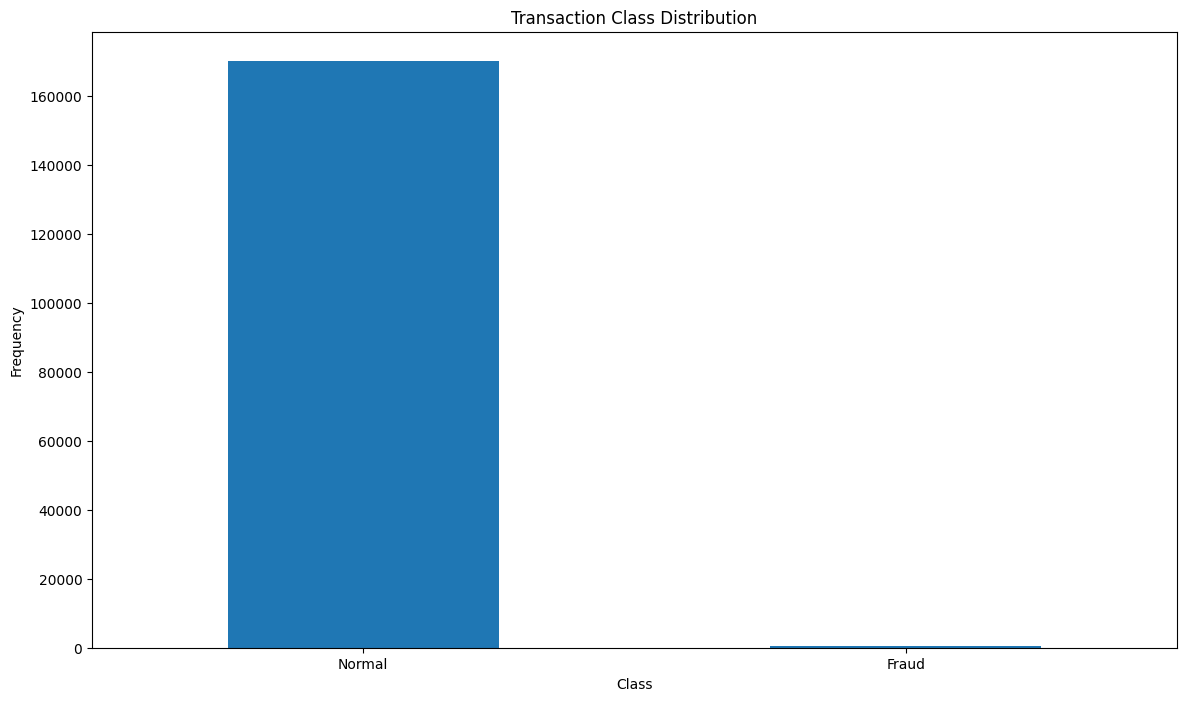

In [34]:
count_classes = pd.value_counts(c['Class'], sort = True)
count_classes.plot(kind='bar', rot =0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2),LABLES)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [35]:
fraud = c[c['Class']==1]
normal = c[c['Class']==0]

In [36]:
fraud.shape

(360, 31)

In [37]:
normal.shape

(170102, 31)

In [38]:
fraud.Amount.describe()

count     360.000000
mean      111.576722
std       227.309252
min         0.000000
25%         1.000000
50%        11.385000
75%       104.007500
max      1809.680000
Name: Amount, dtype: float64

In [39]:
normal.Amount.describe()

count    170102.000000
mean         87.272509
std         246.067820
min           0.000000
25%           5.490000
50%          21.890000
75%          76.500000
max       19656.530000
Name: Amount, dtype: float64

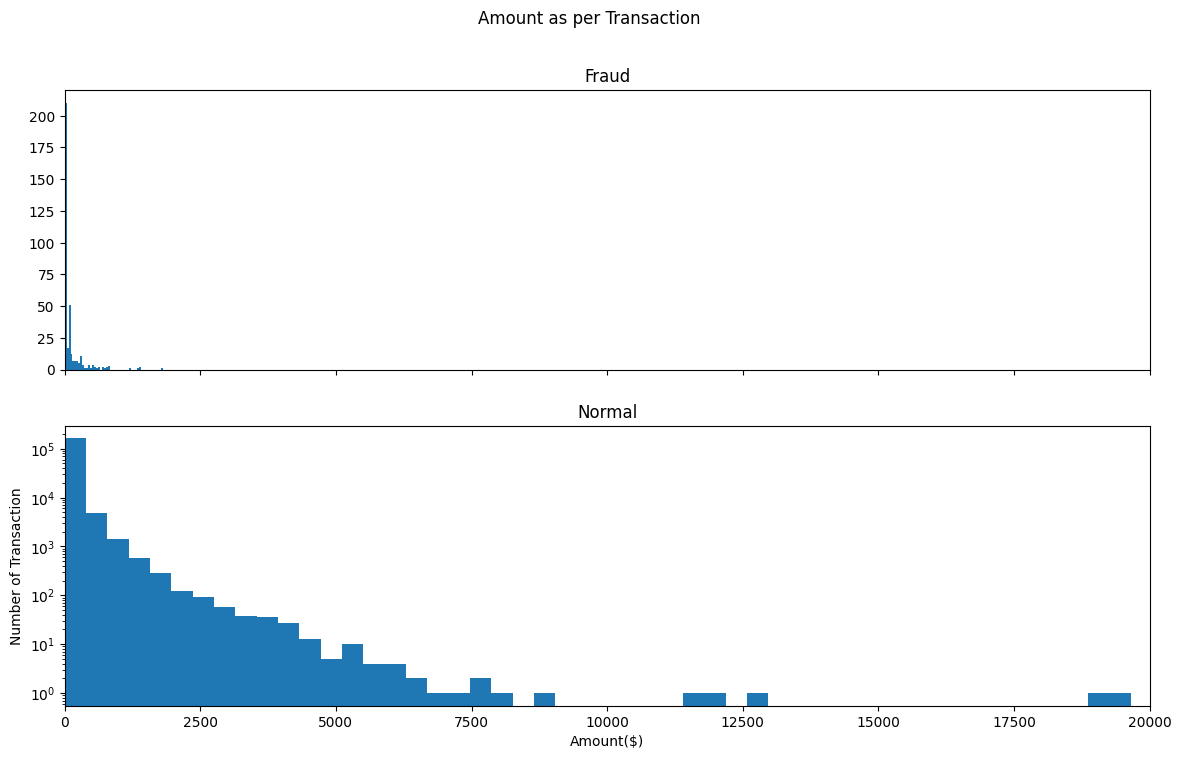

In [40]:
f, (ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount as per Transaction')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount($)')
plt.ylabel('Number of Transaction')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

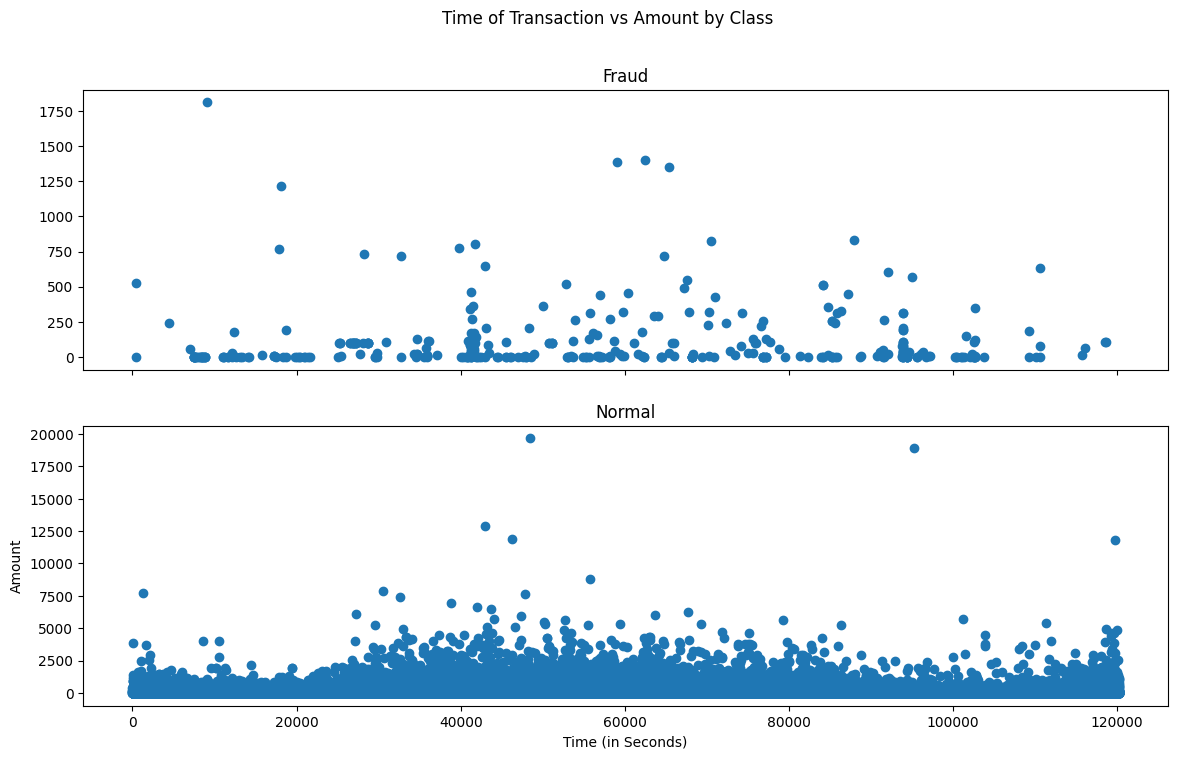

In [41]:
f, (ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Time of Transaction vs Amount by Class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [42]:
credit = c.sample(frac = 0.1, random_state=1)
credit.shape

(17046, 31)

In [43]:
from matplotlib.colors import Normalize

In [44]:
Fraud = credit[credit['Class']==1]
valid = credit[credit['Class']==0]
outlier_function = len(Fraud)/float(len(valid))

In [45]:
print(outlier_function)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(valid)))

0.0022342427093132644
Fraud Cases : 38
Valid Cases : 17008


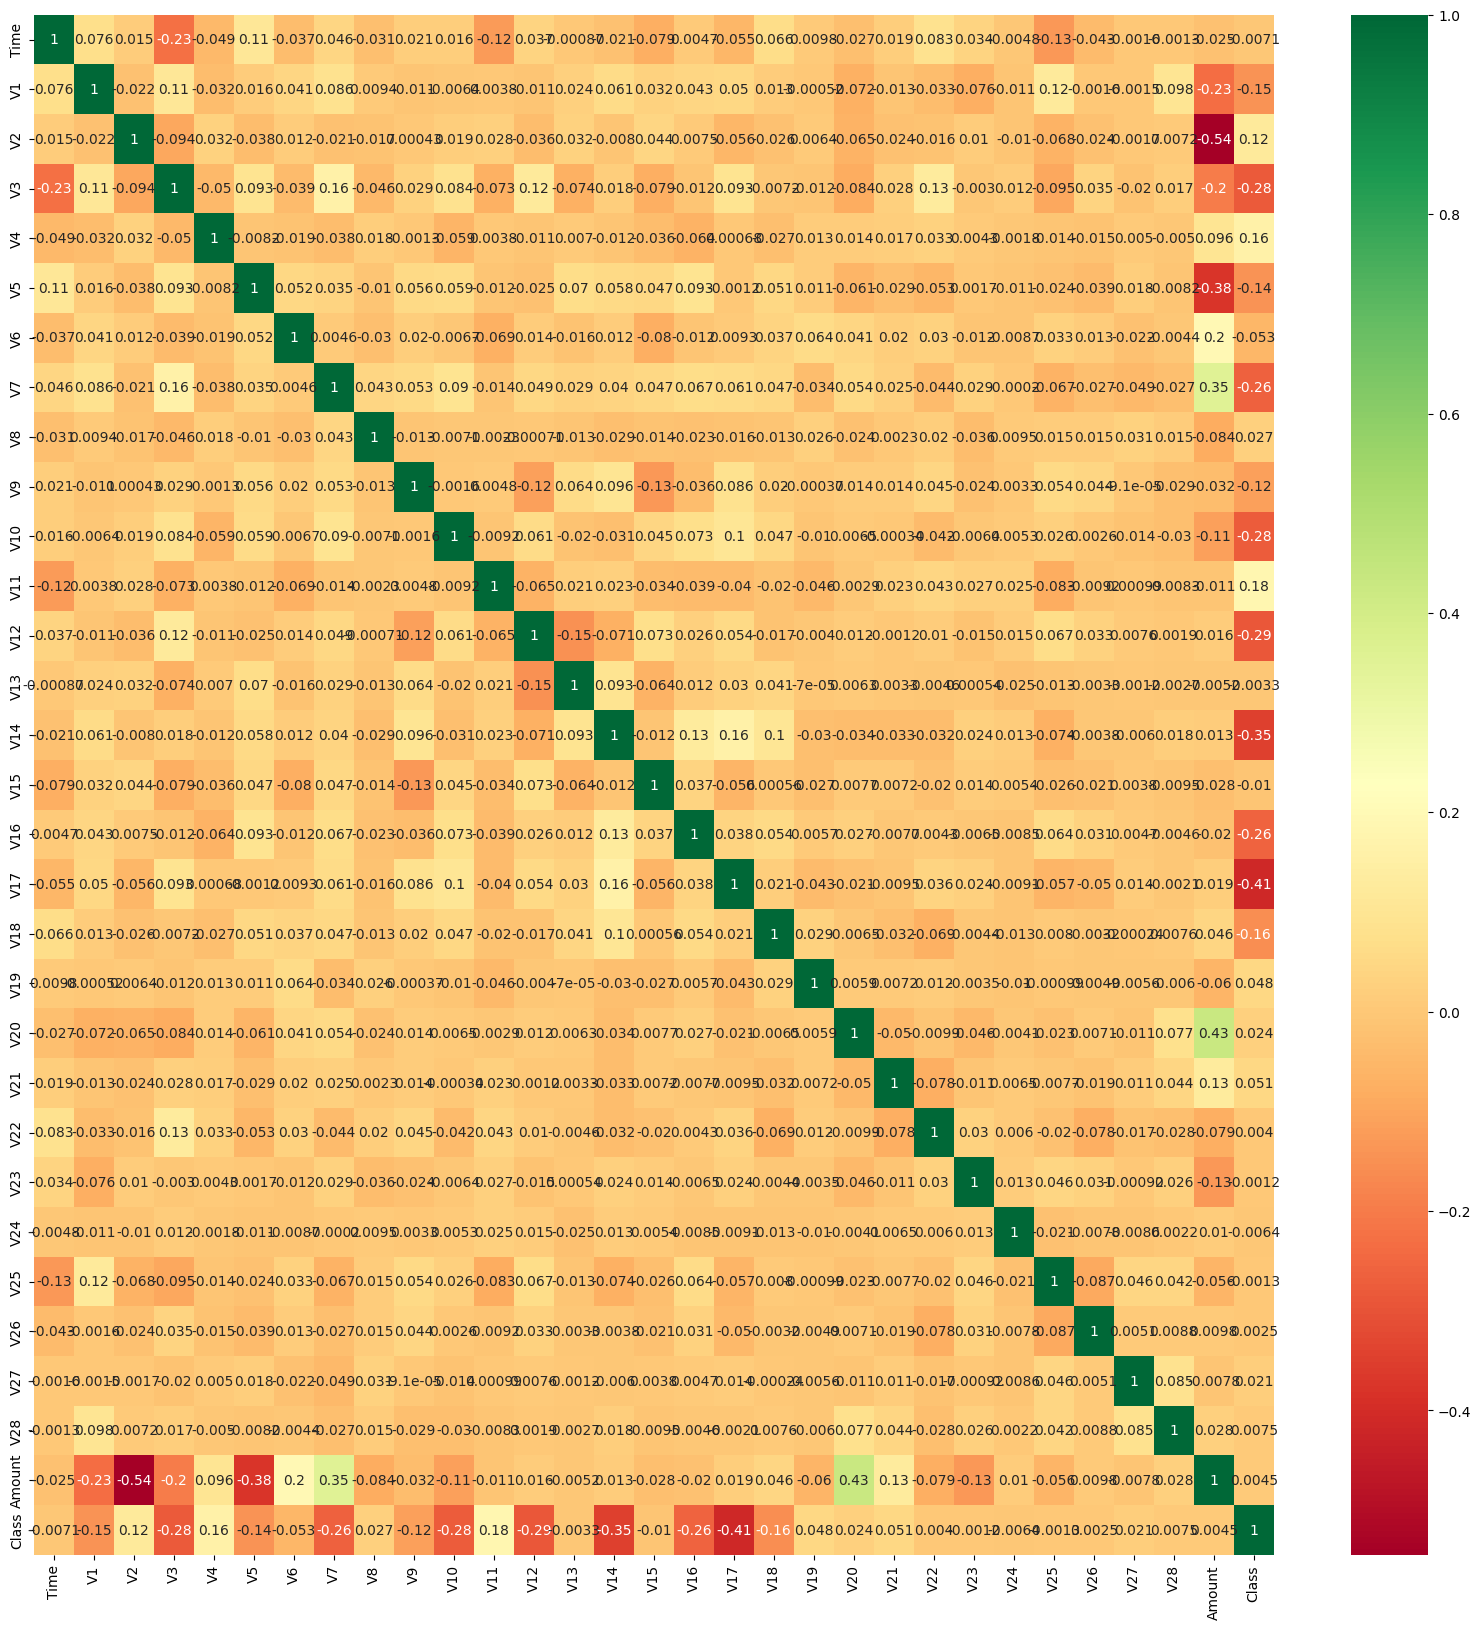

In [46]:
cormat = credit.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(c[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [47]:
columns = credit.columns.tolist()
columns = [C for C in columns if C not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
x = credit[columns]
y = credit[target]
x_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x .shape[1]))
print(x.shape)
print(y.shape)

(17046, 30)
(17046,)


In [48]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(x),contamination=outlier_function,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm="auto",leaf_size=30,metric='minkowski',p=2, metric_params=None,contamination=outlier_function),
    "Support vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, max_iter=-1)
}

In [49]:
n_outliers=len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(x)
    scores_prediction = clf.negative_outlier_factor_
  elif clf_name == "Support Vector Machine":
    clf.fit(x)
    y_pred = clf.predit(x)
  else:
    clf.fit(x)
    scores_prediction = clf.decision_function(x)
    y_pred = clf.predict(x)
  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] =-1
  n_errors = (y_pred != y).sum()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [52]:
print("{}: {}".format(clf_name,n_errors))
print("Accuracy Score :")
print(accuracy_score(y,y_pred))
print("Classification Report :")
print(classification_report(y,y_pred))

Support vector Machine: 10618
Accuracy Score :
0.37709726622081424
Classification Report :
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.38      0.55     17008
         1.0       0.00      0.00      0.00        38

    accuracy                           0.38     17046
   macro avg       0.33      0.13      0.18     17046
weighted avg       0.99      0.38      0.55     17046



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.